In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
rcParams['savefig.dpi'] = 300
rcParams['figure.dpi'] = 300
rcParams['font.family'] = 'Lucida Bright'

### Input

In [3]:
dataset = rasterio.open(r'C:\Users\ianmu\OneDrive - Imperial College London\Thesis Data\DEFRA_DEM_2016_1_Second_South\DEFRA_DEM_2016_1_Second_South.tif')

In [4]:
surge = 0.6912349
surge_tide = surge + 2.247370297

In [5]:
band1 = dataset.read(1) # reading data
A = band1[10000:15000,40000:50000][2000:3000,2000:3000]
A[A<-100000] = np.nan

In [6]:
# plt.imshow(A)
# plt.colorbar()

### Calculating and defining coordinates

In [6]:
lat_bound = 50.56, 50.92
lon_bound = 0.06, 0.42

nat_x = 75386.711, 116182.401
nat_y = 546004.727, 570191.273

x_width = (25.24e3 + 25.43e3)/2 #  m
y_width = 40.03e3 # m

EB_bot = 50.735393
EB_bot_i = 12861 - 5

xl = dataset.bounds[2] - dataset.bounds[0]
yl = dataset.bounds[3] - dataset.bounds[1]

dx_deg = xl/dataset.width
dy_deg = yl/dataset.height


xbound = round((lon_bound[0] - dataset.bounds[0])/dx_deg), round((lon_bound[1] - dataset.bounds[0])/dx_deg)
# ybound = round((lat_bound[0] - dataset.bounds[1])/dy_deg), round((lat_bound[1] - dataset.bounds[1])/dy_deg)
ybound = EB_bot_i - round((lat_bound[1] - EB_bot)/dy_deg), EB_bot_i + round((EB_bot - lat_bound[0])/dy_deg)

cel_x_width = x_width/(xbound[1] - xbound[0])
cel_y_width = y_width/(ybound[1] - ybound[0])

print(cel_x_width, cel_y_width)
ybound[1] - ybound[0]

loc = ([50.75176, 0.2715],
[50.75948, 0.28489],
[50.7672, 0.29365],
[50.77567, 0.3043],
[50.78143, 0.31752],
[50.7848, 0.32885],
[50.790249, 0.332814],
[50.79914, 0.33984],
[50.8024, 0.33349],
[50.80576, 0.32988],
[50.80739, 0.32284],
[50.8088, 0.30567],
[50.81782, 0.29588],
[50.82324, 0.2691],
[50.82596, 0.25021],
[50.829, 0.23922],
[50.82183, 0.23407],
[50.8113, 0.2308],
[50.80468, 0.24265],
[50.79968, 0.25021],
[50.79088, 0.24437],
[50.78893, 0.2533],
[50.7823, 0.24437],
[50.77611, 0.24832],
[50.77024, 0.24866],
[50.76524, 0.25605],
[50.76731, 0.2691],
[50.76285, 0.2691],
[50.75774, 0.25192],
[50.75187, 0.2606],
[50.75176, 0.2715])

SWASH_c = 50.7768131216, 0.3034973120
SWASH_c_i = round((SWASH_c[1] - lon_bound[0])/dy_deg), round((SWASH_c[0] - lat_bound[0])/dy_deg)
SWASH_c_m = SWASH_c_i * np.array([cel_x_width,cel_y_width])

co_loc1 = 50.771033, 0.298899
loc1_i = round((co_loc1[1] - lon_bound[0])/dy_deg), round((co_loc1[0] - lat_bound[0])/dy_deg)
loc1_m = loc1_i * np.array([cel_x_width,cel_y_width])
co_loc2 = 50.783527, 0.327639
loc2_i = round((co_loc2[1] - lon_bound[0])/dy_deg), round((co_loc2[0] - lat_bound[0])/dy_deg)
loc2_m = loc2_i * np.array([cel_x_width,cel_y_width])
co_loc3 = 50.794135, 0.337487
loc3_i = round((co_loc3[1] - lon_bound[0])/dy_deg), round((co_loc3[0] - lat_bound[0])/dy_deg)
loc3_m = loc3_i * np.array([cel_x_width,cel_y_width])


loc_m_ = np.zeros([len(loc),2])
for i in range(len(loc)):
    loc_i = round((loc[i][1] - lon_bound[0])/dy_deg), round((loc[i][0] - lat_bound[0])/dy_deg)
    loc_m = loc_i * np.array([cel_x_width,cel_y_width])
    loc_m_[i] = loc_m
y_width

19.54861111111111 30.887345679012345


40030.0

### Create bottom and plot

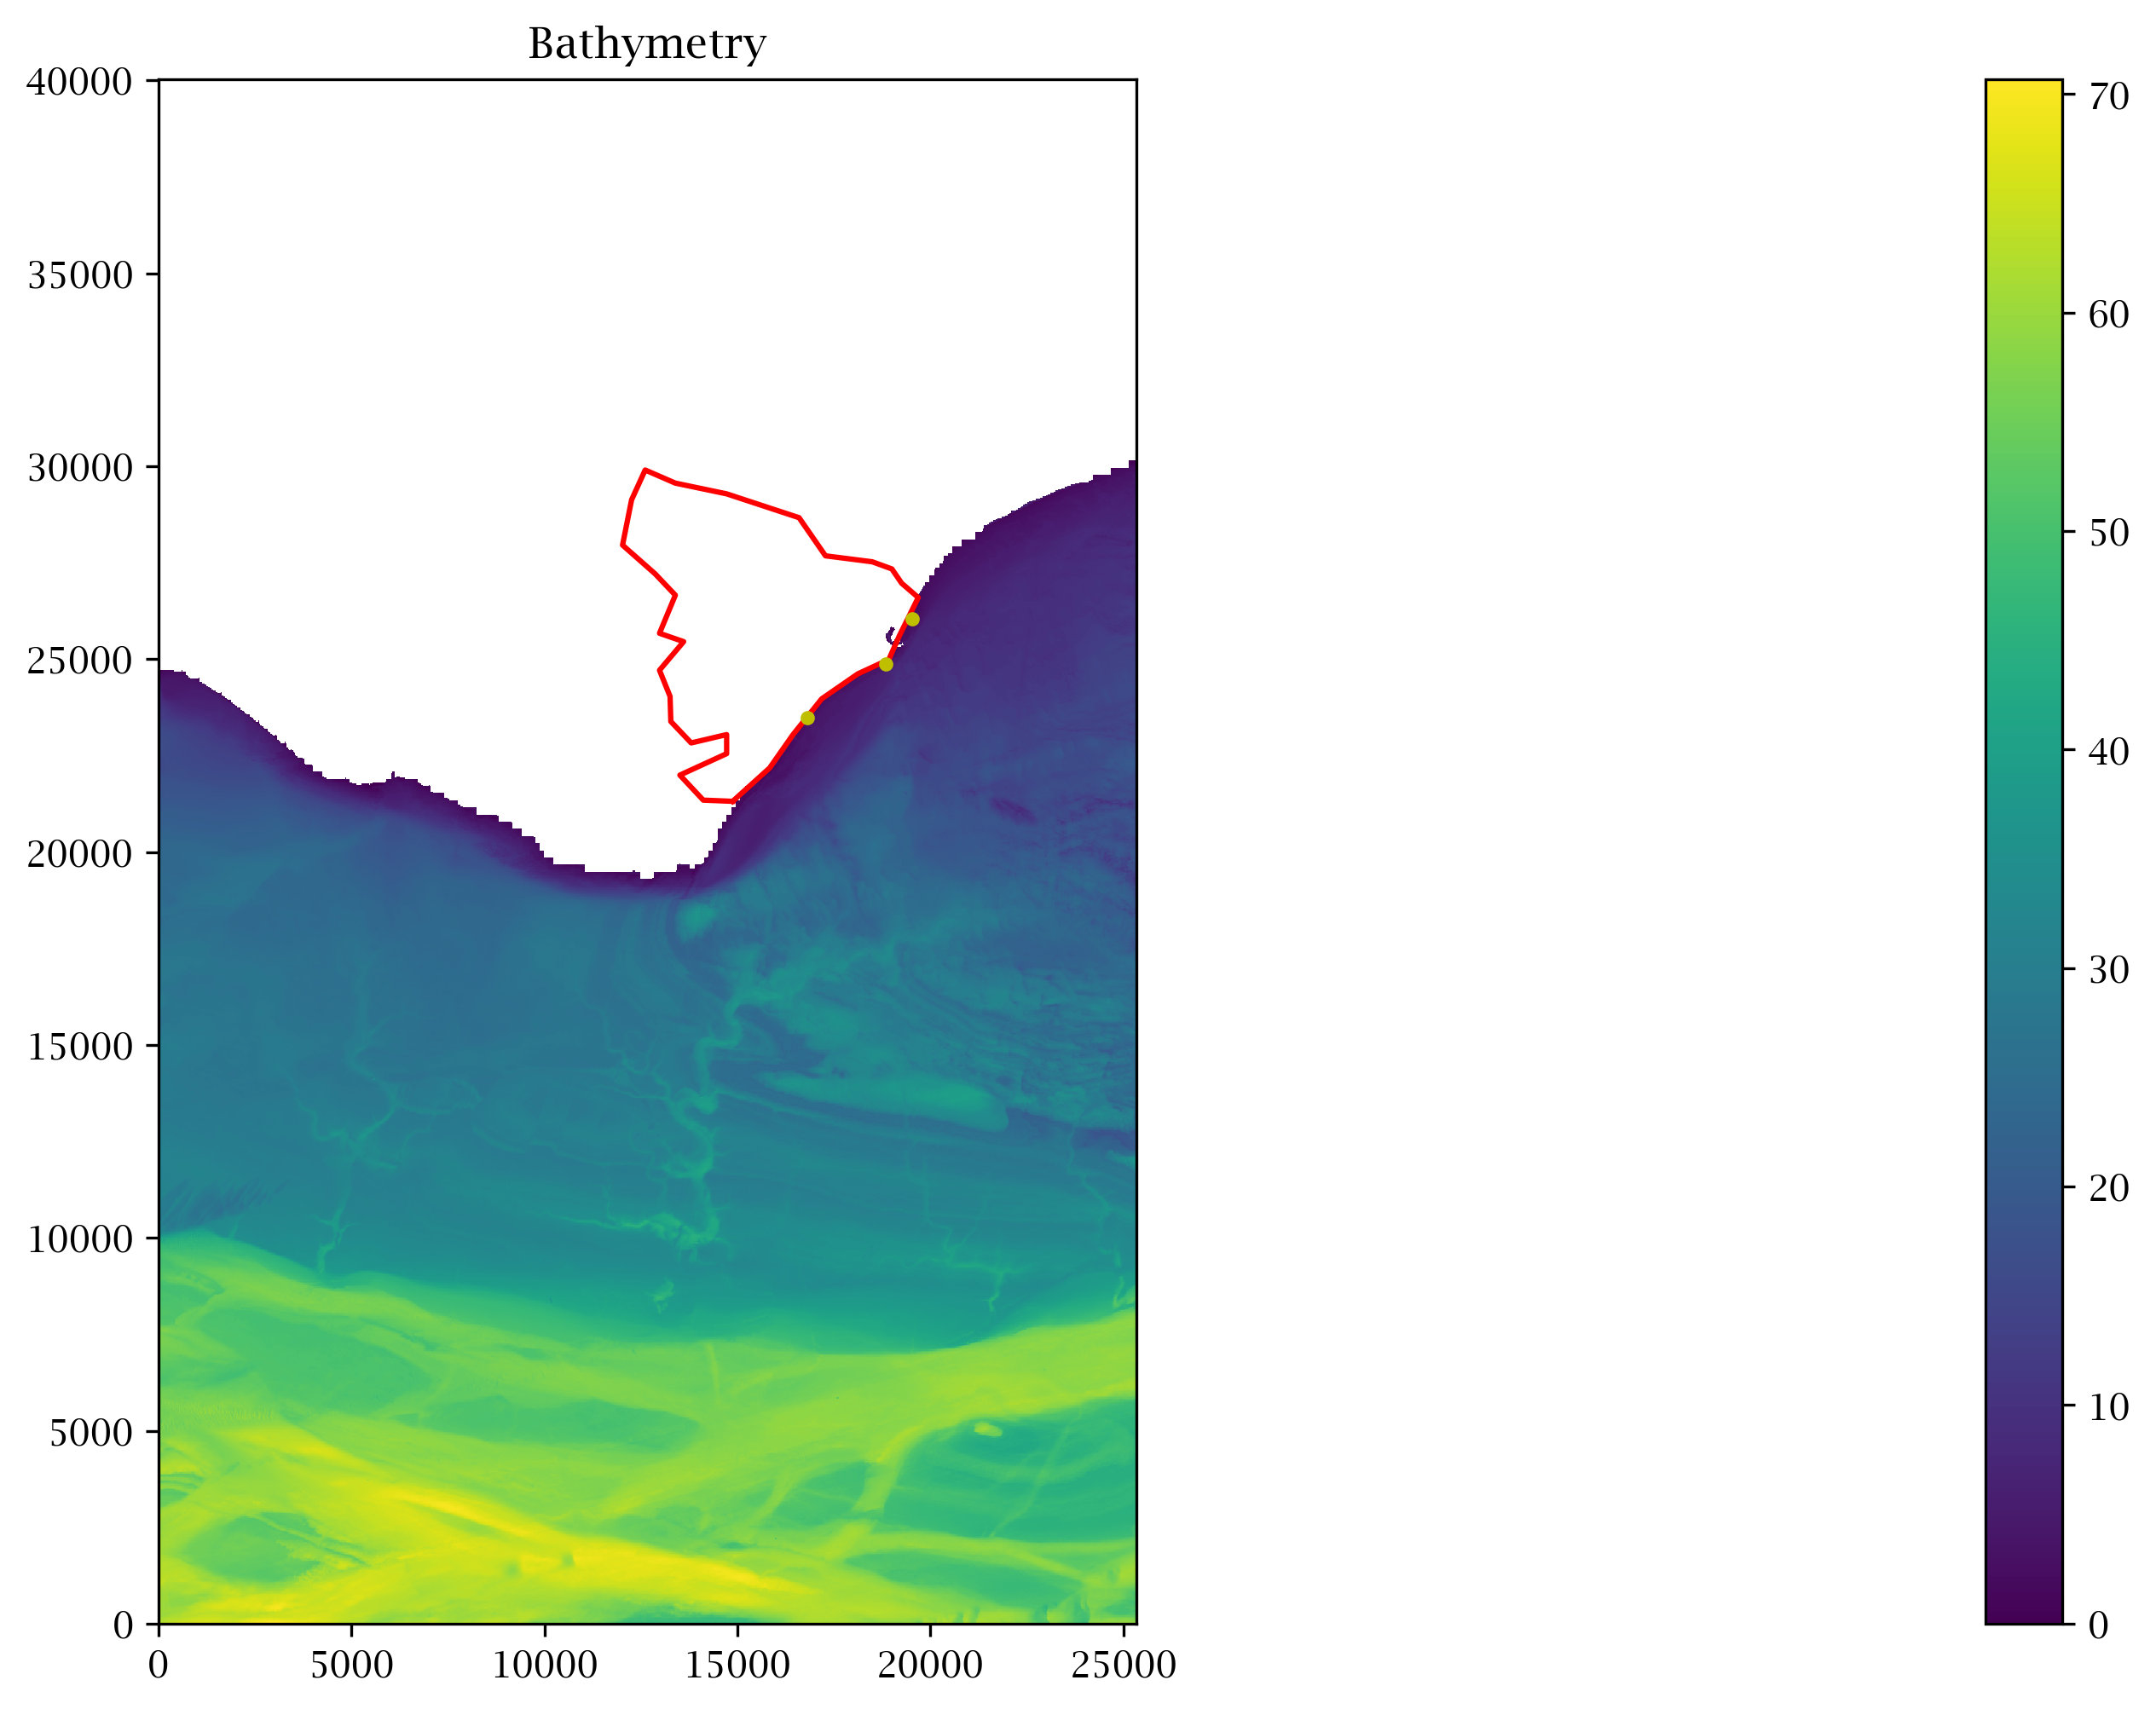

In [42]:
bottom = -band1[ybound[0]:ybound[1],xbound[0]:xbound[1]] + 3.09115637461 # HQ data match shift 
bottom[bottom > 99] = -99
bottom[bottom == -99] = np.nan
plt.figure(figsize=[15,8])
plt.imshow(bottom,vmax=np.nanmax(bottom),vmin=0, extent = [0 , x_width, 0, y_width])
plt.colorbar()

plt.plot(loc_m_[:,0],loc_m_[:,1],'r')
# plt.plot(SWASH_c_m[0],SWASH_c_m[1],'b.')
plt.title('Bathymetry')
plt.axis('scaled')

plt.plot(loc1_m[0],loc1_m[1],'y.')
plt.plot(loc2_m[0],loc2_m[1],'y.')
plt.plot(loc3_m[0],loc3_m[1],'y.')
plt.title('Bathymetry')
plt.axis('scaled')

bottom = -band1[ybound[0]:ybound[1],xbound[0]:xbound[1]] + 3.09115637461 # HQ data match shift 
bottom[bottom > 99] = -99

### create waterlevel file

In [21]:
wlv = np.ones([len(bottom),len(bottom[0])]) * surge_tide
wlv[bottom == -99] = -99

### Save files

In [43]:
np.savetxt('../../../Schenarios/Eastbourn_lowres_shift.bot',bottom,delimiter = ' ')
# np.savetxt('.././../SWAN/Input/Eastbourne_01/Eastbourne_01.wlv',wlv,delimiter = ' ')